### 1 - Loading Dataset

If you dont have tf-idf-dataset.json you must run tf-idf-processing.ipynb first

In [1]:
import json
import numpy as np

from sklearn.model_selection import train_test_split


# loading dataset
dataset = json.load(open("Dataset/tf-idf-dataset.json", "r"))

X = []
y = []
classes = dataset["ClassNames"]

# extracting X and y from json dataset
for data in dataset["Dataset"]:
    X.append(data["x"])
    y.append(data["y"])

print(f"total dataset length: {len(X)}")

X = np.array(X)
y = np.array(y)

# spliting dataset
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(x_train.shape)
print(y_train.shape)

total dataset length: 42663
(29864, 5000)
(29864, 8)


### 2 - Models (Tests)

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Plotting training history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

#### 2.1 - Simple DNN

Epoch 1/10
234/234 [==============================] - 2s 7ms/step - loss: 0.8555 - accuracy: 0.8228 - val_loss: 0.4262 - val_accuracy: 0.8660
Epoch 2/10
234/234 [==============================] - 1s 6ms/step - loss: 0.3500 - accuracy: 0.8854 - val_loss: 0.3587 - val_accuracy: 0.8759
Epoch 3/10
234/234 [==============================] - 2s 7ms/step - loss: 0.2724 - accuracy: 0.9094 - val_loss: 0.3431 - val_accuracy: 0.8782
Epoch 4/10
234/234 [==============================] - 2s 7ms/step - loss: 0.2238 - accuracy: 0.9249 - val_loss: 0.3440 - val_accuracy: 0.8773
Epoch 5/10
234/234 [==============================] - 1s 6ms/step - loss: 0.1872 - accuracy: 0.9387 - val_loss: 0.3495 - val_accuracy: 0.8764
Epoch 6/10
234/234 [==============================] - 1s 6ms/step - loss: 0.1582 - accuracy: 0.9503 - val_loss: 0.3603 - val_accuracy: 0.8758
Epoch 7/10
234/234 [==============================] - 1s 6ms/step - loss: 0.1345 - accuracy: 0.9599 - val_loss: 0.3761 - val_accuracy: 0.8712
Epoch 

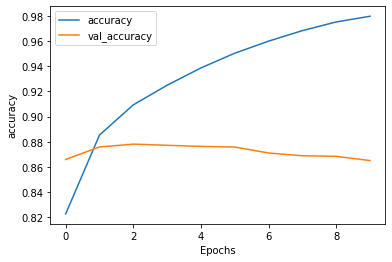

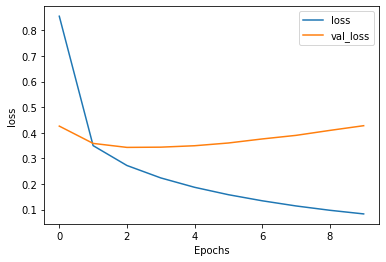

In [12]:
model_1 =  tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(5000,), activation="relu"),
    tf.keras.layers.Dense(len(classes), activation="softmax")
])

model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_1.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=10, verbose=1)

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Training accuracy is good but val_accuracy too low it means model overfitted to training set
But i am impressed this little neural network has %97 acc

#### 2.2 - More Bigger DNN

Epoch 1/10
234/234 [==============================] - 3s 10ms/step - loss: 0.5056 - accuracy: 0.8369 - val_loss: 0.3562 - val_accuracy: 0.8750
Epoch 2/10
234/234 [==============================] - 2s 8ms/step - loss: 0.2060 - accuracy: 0.9266 - val_loss: 0.3862 - val_accuracy: 0.8698
Epoch 3/10
234/234 [==============================] - 2s 8ms/step - loss: 0.1009 - accuracy: 0.9642 - val_loss: 0.4939 - val_accuracy: 0.8581
Epoch 4/10
234/234 [==============================] - 2s 8ms/step - loss: 0.0470 - accuracy: 0.9845 - val_loss: 0.6178 - val_accuracy: 0.8587
Epoch 5/10
234/234 [==============================] - 2s 8ms/step - loss: 0.0251 - accuracy: 0.9916 - val_loss: 0.7058 - val_accuracy: 0.8612
Epoch 6/10
234/234 [==============================] - 2s 8ms/step - loss: 0.0174 - accuracy: 0.9943 - val_loss: 0.7567 - val_accuracy: 0.8644
Epoch 7/10
234/234 [==============================] - 2s 8ms/step - loss: 0.0146 - accuracy: 0.9946 - val_loss: 0.7724 - val_accuracy: 0.8669
Epoch

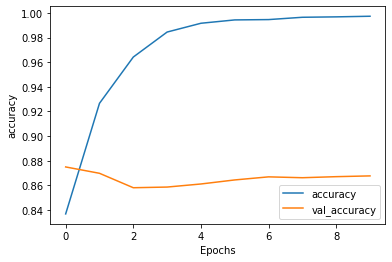

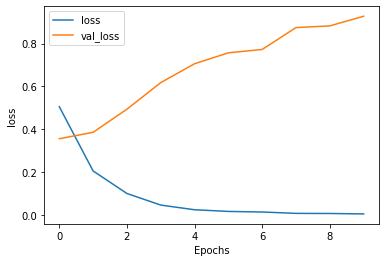

In [4]:
model_2 =  tf.keras.Sequential([
    tf.keras.layers.Dense(1000, input_shape=(5000,), activation="relu"),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(len(classes), activation="softmax")
])

model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_2.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=10, verbose=1)

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Training accuracy is more good than model 1 but it is still overfitting to traing set

#### 2.3 - DNN with Droput

Epoch 1/10
234/234 [==============================] - 3s 10ms/step - loss: 0.6639 - accuracy: 0.7790 - val_loss: 0.3569 - val_accuracy: 0.8756
Epoch 2/10
234/234 [==============================] - 2s 9ms/step - loss: 0.2905 - accuracy: 0.9053 - val_loss: 0.3579 - val_accuracy: 0.8791
Epoch 3/10
234/234 [==============================] - 2s 8ms/step - loss: 0.1869 - accuracy: 0.9377 - val_loss: 0.4105 - val_accuracy: 0.8756
Epoch 4/10
234/234 [==============================] - 2s 9ms/step - loss: 0.1124 - accuracy: 0.9637 - val_loss: 0.4628 - val_accuracy: 0.8717
Epoch 5/10
234/234 [==============================] - 2s 9ms/step - loss: 0.0757 - accuracy: 0.9768 - val_loss: 0.5490 - val_accuracy: 0.8669
Epoch 6/10
234/234 [==============================] - 2s 9ms/step - loss: 0.0537 - accuracy: 0.9829 - val_loss: 0.5862 - val_accuracy: 0.8701
Epoch 7/10
234/234 [==============================] - 2s 9ms/step - loss: 0.0476 - accuracy: 0.9857 - val_loss: 0.6279 - val_accuracy: 0.8718
Epoch

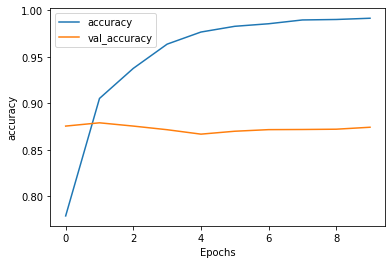

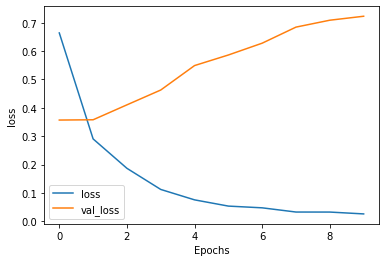

In [5]:
model_3 =  tf.keras.Sequential([

    tf.keras.layers.Dense(1000, input_shape=(5000,), activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(500, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(classes), activation="softmax")
])

model_3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_3.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=10, verbose=1)

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")


#### 2.3 - Simple DNN with Droput

Epoch 1/10
234/234 [==============================] - 2s 8ms/step - loss: 0.7620 - accuracy: 0.8132 - val_loss: 0.3937 - val_accuracy: 0.8703
Epoch 2/10
234/234 [==============================] - 1s 6ms/step - loss: 0.3292 - accuracy: 0.8893 - val_loss: 0.3461 - val_accuracy: 0.8791
Epoch 3/10
234/234 [==============================] - 2s 7ms/step - loss: 0.2552 - accuracy: 0.9135 - val_loss: 0.3386 - val_accuracy: 0.8787
Epoch 4/10
234/234 [==============================] - 2s 7ms/step - loss: 0.2086 - accuracy: 0.9309 - val_loss: 0.3477 - val_accuracy: 0.8746
Epoch 5/10
234/234 [==============================] - 1s 6ms/step - loss: 0.1698 - accuracy: 0.9446 - val_loss: 0.3615 - val_accuracy: 0.8734
Epoch 6/10
234/234 [==============================] - 1s 6ms/step - loss: 0.1415 - accuracy: 0.9553 - val_loss: 0.3716 - val_accuracy: 0.8733
Epoch 7/10
234/234 [==============================] - 2s 7ms/step - loss: 0.1167 - accuracy: 0.9650 - val_loss: 0.3904 - val_accuracy: 0.8701
Epoch 

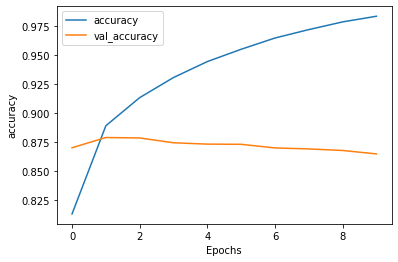

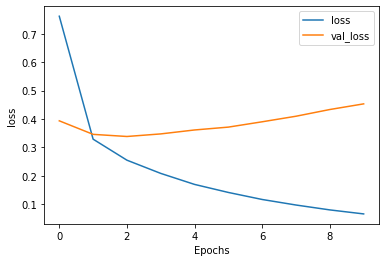

In [11]:
model_4 =  tf.keras.Sequential([

    tf.keras.layers.Dense(200, input_shape=(5000,), activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes), activation="softmax")
])

model_4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model_4.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=128, epochs=10, verbose=1)

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")



#### 2.4 - Conculusion

All model has over fitting to training set, val_accuracy is too low. I tried droput but it didn't work, i will try to use word embedding, lstm, conv1d but not in this repo
</br>
I will choose model 1 because other models dosen't improve anything, so i will choose simple one because running time and memory


### 3 - Evaluation Plots

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# getting y_red for x_test i want to see test set precission, classification_report and confusion_matrix
y_pred = model_1.predict(x_test, batch_size=128)
y_pred_1d = y_pred.argmax(1)
y_test_1d = y_test.argmax(1)

print(f"{classification_report(y_pred_1d, y_test_1d, target_names=classes)}")

              precision    recall  f1-score   support

  Automobile       0.94      0.94      0.94      1605
      Living       0.71      0.69      0.70      1660
      Health       0.88      0.88      0.88      1597
       Daily       0.73      0.74      0.73      1576
       Sport       0.93      0.93      0.93      1597
  Technology       0.92      0.94      0.93      1528
     Economy       0.86      0.85      0.86      1625
    Magazine       0.96      0.94      0.95      1611

    accuracy                           0.87     12799
   macro avg       0.87      0.87      0.87     12799
weighted avg       0.87      0.87      0.87     12799



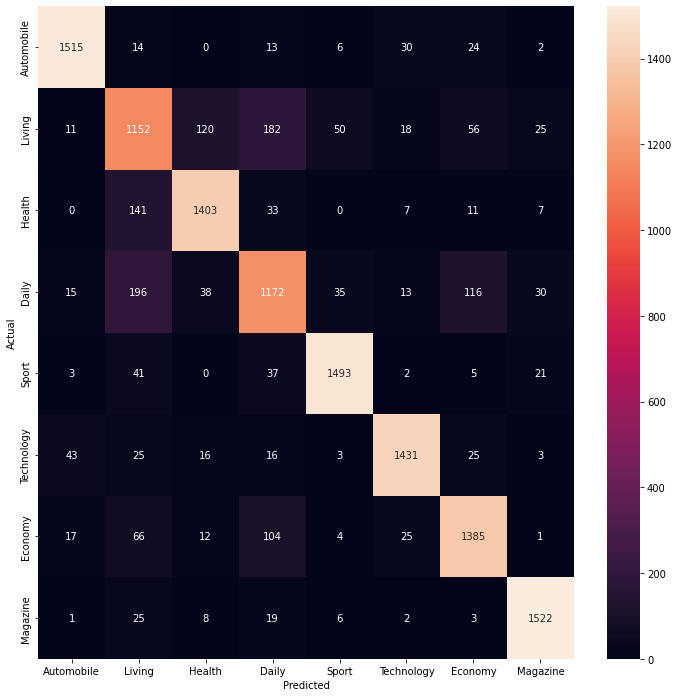

In [14]:
import pandas as pd
import seaborn as sn

confusion_matrix = pd.crosstab(y_test_1d, y_pred_1d, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(12, 12)) # for more bigger plot
sn.heatmap(confusion_matrix, annot=True, xticklabels=classes, yticklabels=classes, fmt='g')
plt.show()


My conclusion is living, health and daily classes has more similar content and this reason it makes lower accuracy.</br>
If you will look at precision and recall you will see model living hard times to trust prediction on Daily class
Also i analysed Daily Class myself and it has more news variation than others.
As you can understand living and health has relation between them and it is makes hard to classify

In [ ]:
# saving model for api usage
model_1.save(f"Models/keras_ann_v1.h5")